Programming Assignment 2
Decision Tree Classifier:

                                  Kauhsik Budur
                                  Mymav ID: 1002224112


In [24]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
from google.colab import files
uploaded = files.upload()

dataset = pd.read_csv('dataset_DT.csv')  # Use the name of your uploaded file


# Display the first few rows of the dataset
print(dataset.head())
print(dataset.columns)
num_rows, num_columns = dataset.shape
print(f'Number of rows: {num_rows}, Number of columns: {num_columns}')


Saving dataset_DT.csv to dataset_DT (2).csv
    age          job   marital  education default  balance housing loan  \
0  34.0  blue-collar    single  secondary      no  13408.0      no   no   
1  49.0   management  divorced   tertiary      no  20727.0      no   no   
2  32.0     services    single   tertiary      no   1743.0     yes   no   
3  46.0   management  divorced   tertiary      no  10469.0     yes   no   
4  26.0   management    single   tertiary      no   7628.0      no   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular  1.0   apr     647.0       2.0   -1.0       0.0  unknown  no  
1  cellular  1.0   apr     285.0       3.0  132.0       2.0  failure  no  
2  cellular  1.0   apr    1156.0       1.0  261.0       3.0    other  no  
3  cellular  1.0   apr     202.0       2.0   -1.0       0.0  unknown  no  
4  cellular  1.0   apr     263.0       1.0   -1.0       0.0  unknown  no  
Index(['age', 'job', 'marital', 'education', 'default',

In [25]:
# Check for missing values
print(dataset.columns)
print(dataset.isnull().sum())

# # # Drop missing values
# # dataset.dropna(inplace=True)


# Check for missing values
print("Missing values in each column:\n", dataset.isnull().sum())

# Impute missing values
for column in dataset.columns:
    if dataset[column].dtype == 'object':
        # If the column is categorical, fill with the mode
        dataset[column].fillna(dataset[column].mode()[0], inplace=True)
    else:
        # If the column is numerical, fill with the mean
        dataset[column].fillna(dataset[column].mean(), inplace=True)

# Check again for missing values to ensure they are filled
print("Missing values after imputation:\n", dataset.isnull().sum())

num_rows, num_columns = dataset.shape
print(f'Number of rows: {num_rows}, Number of columns: {num_columns}')

# Check the processed dataset
print(dataset.head())


# Check for duplicates
duplicates = dataset.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Display duplicate rows
print(dataset[duplicates])


# Convert categorical variables to numerical using one-hot encoding
dataset = pd.get_dummies(dataset, drop_first=True)

# Select only numeric columns
numeric_columns = dataset.select_dtypes(include=[np.number]).columns.tolist()

# IQR Method
outlier_rows = pd.Series(False, index=dataset.index)

for column in numeric_columns:
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_rows |= (dataset[column] < lower_bound) | (dataset[column] > upper_bound)

print(f"Number of rows with outliers (IQR): {np.sum(outlier_rows)}")
dataset = dataset[~outlier_rows]



# Check the processed dataset
print(dataset.head())
num_rows, num_columns = dataset.shape
print(f'Number of rows: {num_rows}, Number of columns: {num_columns}')


# Get the number of rows and columns
num_rows, num_columns = dataset.shape

# Print the number of rows and columns
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')
age            0
job            0
marital        0
education    320
default        0
balance        0
housing        0
loan           0
contact        0
day          306
month        314
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64
Missing values in each column:
 age            0
job            0
marital        0
education    320
default        0
balance        0
housing        0
loan           0
contact        0
day          306
month        314
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64
Missing values after imputation:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         

<ipython-input-25-4fdf6e085295>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[column].fillna(dataset[column].mean(), inplace=True)
<ipython-input-25-4fdf6e085295>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [26]:
print(dataset.columns)


Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'y_yes'],
      dtype='object')


In [27]:
# Separate features and target variable
X = dataset.drop('y_yes', axis=1)  # Replace with your target variable name
y = dataset['y_yes']

# Fit a Decision Tree to get feature importances
model = DecisionTreeClassifier()
model.fit(X, y)

# Get feature importances and sort them
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Get the six most influential attributes
most_influential_features = X.columns[indices][:6]
print("Six most influential attributes:")
for i in range(6):
    print(f"{i + 1}. {most_influential_features[i]}: {importances[indices[i]]:.4f}")


Six most influential attributes:
1. duration: 0.2009
2. balance: 0.1261
3. age: 0.1166
4. day: 0.0996
5. contact_unknown: 0.0512
6. poutcome_success: 0.0358


In [28]:
# Split the dataset into training and testing sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [34]:
# Create two Decision Tree Classifiers: one with Gini and one with Entropy
gini_model = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=5)
entropy_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5)

# Parameters to explore
max_depths = [3, 5, 7, None]  # None means no limit on depth
min_samples_leaves = [1, 2, 5]

for criterion in ['gini', 'entropy']:
    for max_depth in max_depths:
        for min_samples_leaf in min_samples_leaves:
            # Create and train the Decision Tree Classifier
            model = DecisionTreeClassifier(
                criterion=criterion,
                max_depth=max_depth,
                min_samples_leaf=min_samples_leaf,
                random_state=42
            )
            model.fit(X_train, y_train)

            # Calculate training accuracy
            train_accuracy = model.score(X_train, y_train)
            test_accuracy = model.score(X_test, y_test)

            print(f"Criterion: {criterion}, Max Depth: {max_depth}, Min Samples Leaf: {min_samples_leaf}")
            print(f"Training Accuracy: {train_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}")

# Fit both models
gini_model.fit(X_train, y_train)
entropy_model.fit(X_train, y_train)


Criterion: gini, Max Depth: 3, Min Samples Leaf: 1
Training Accuracy: 0.77, Test Accuracy: 0.76
Criterion: gini, Max Depth: 3, Min Samples Leaf: 2
Training Accuracy: 0.77, Test Accuracy: 0.76
Criterion: gini, Max Depth: 3, Min Samples Leaf: 5
Training Accuracy: 0.77, Test Accuracy: 0.76
Criterion: gini, Max Depth: 5, Min Samples Leaf: 1
Training Accuracy: 0.79, Test Accuracy: 0.77
Criterion: gini, Max Depth: 5, Min Samples Leaf: 2
Training Accuracy: 0.79, Test Accuracy: 0.77
Criterion: gini, Max Depth: 5, Min Samples Leaf: 5
Training Accuracy: 0.79, Test Accuracy: 0.77
Criterion: gini, Max Depth: 7, Min Samples Leaf: 1
Training Accuracy: 0.82, Test Accuracy: 0.78
Criterion: gini, Max Depth: 7, Min Samples Leaf: 2
Training Accuracy: 0.82, Test Accuracy: 0.78
Criterion: gini, Max Depth: 7, Min Samples Leaf: 5
Training Accuracy: 0.82, Test Accuracy: 0.78
Criterion: gini, Max Depth: None, Min Samples Leaf: 1
Training Accuracy: 1.00, Test Accuracy: 0.75
Criterion: gini, Max Depth: None, Min

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5)

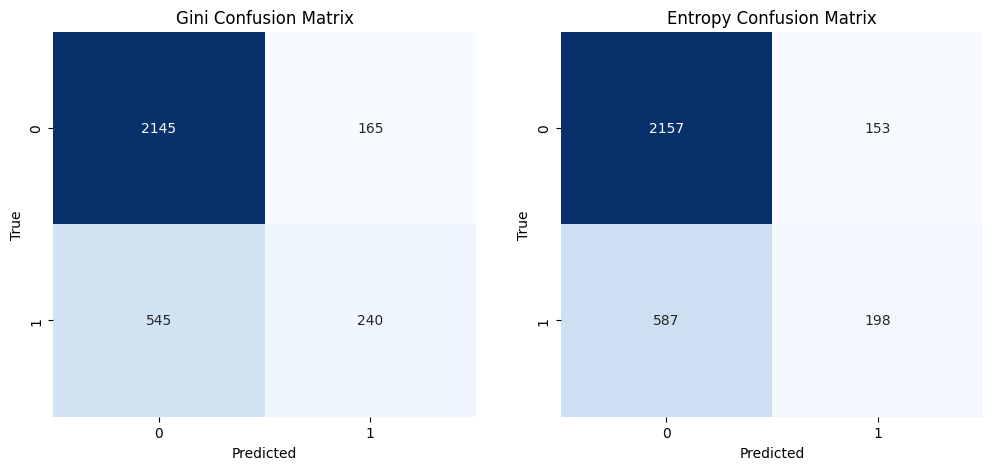

Gini Classification Report:
               precision    recall  f1-score   support

       False       0.80      0.93      0.86      2310
        True       0.59      0.31      0.40       785

    accuracy                           0.77      3095
   macro avg       0.69      0.62      0.63      3095
weighted avg       0.75      0.77      0.74      3095

Entropy Classification Report:
               precision    recall  f1-score   support

       False       0.79      0.93      0.85      2310
        True       0.56      0.25      0.35       785

    accuracy                           0.76      3095
   macro avg       0.68      0.59      0.60      3095
weighted avg       0.73      0.76      0.73      3095



In [35]:
# Make predictions
gini_pred = gini_model.predict(X_test)
entropy_pred = entropy_model.predict(X_test)

# Generate confusion matrices
gini_cm = confusion_matrix(y_test, gini_pred)
entropy_cm = confusion_matrix(y_test, entropy_pred)

# Plot confusion matrices
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(gini_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Gini Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 2, 2)
sns.heatmap(entropy_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Entropy Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

# Print classification reports
print("Gini Classification Report:\n", classification_report(y_test, gini_pred))
print("Entropy Classification Report:\n", classification_report(y_test, entropy_pred))


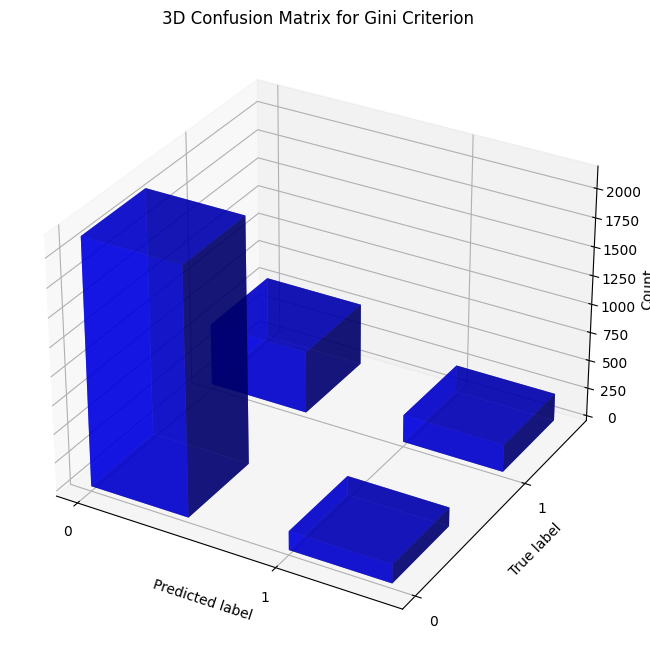

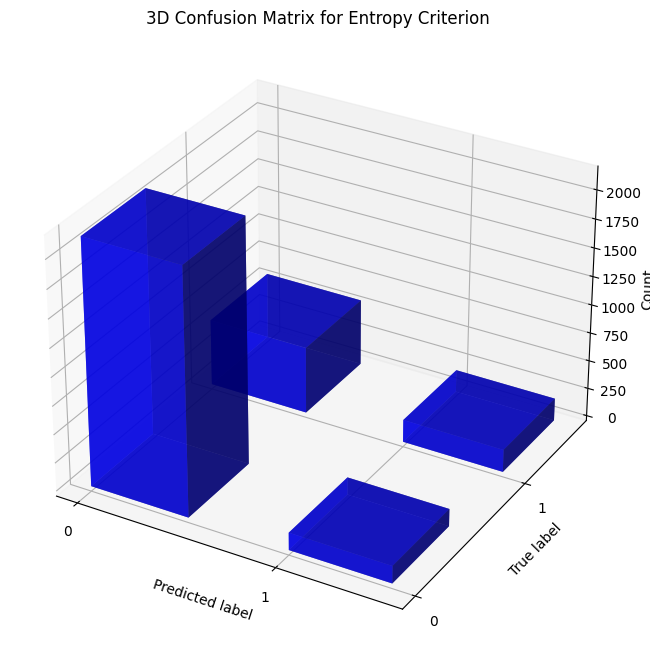

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Create a function to plot 3D confusion matrix
def plot_3d_confusion_matrix(cm, title):
    # Define the size of the matrix
    classes = range(cm.shape[0])
    x, y = np.meshgrid(classes, classes)

    # Set up the figure
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the bars
    ax.bar3d(x.flatten(), y.flatten(), np.zeros_like(cm.flatten()),
             dx=0.5, dy=0.5, dz=cm.flatten(),
             color='b', alpha=0.7, zsort='average')

    # Set labels and title
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    ax.set_zlabel('Count')
    ax.set_title(title)

    # Customize ticks
    ax.set_xticks(classes)
    ax.set_yticks(classes)

    # Show the plot
    plt.show()

# Confusion Matrix for Gini
gini_cm = confusion_matrix(y_test, gini_pred)

# Confusion Matrix for Entropy
entropy_cm = confusion_matrix(y_test, entropy_pred)

# Plotting the 3D confusion matrices
plot_3d_confusion_matrix(gini_cm, title='3D Confusion Matrix for Gini Criterion')
plot_3d_confusion_matrix(entropy_cm, title='3D Confusion Matrix for Entropy Criterion')


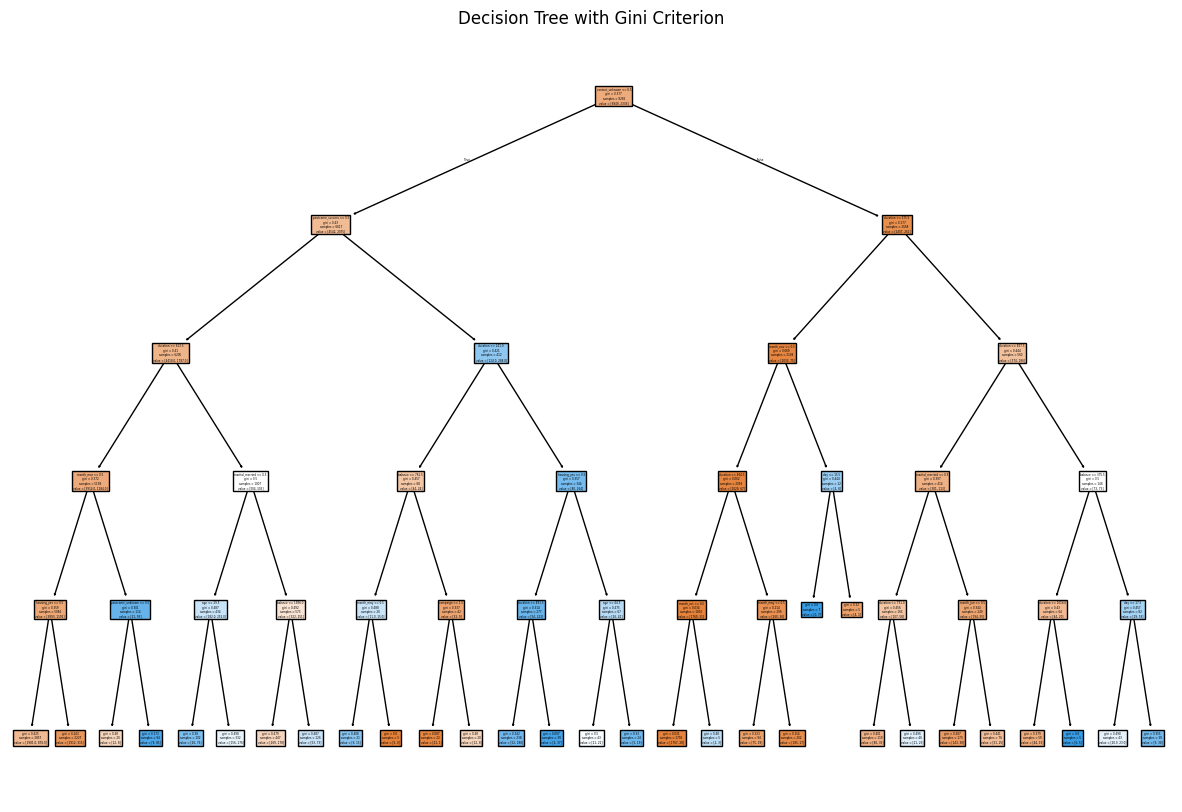

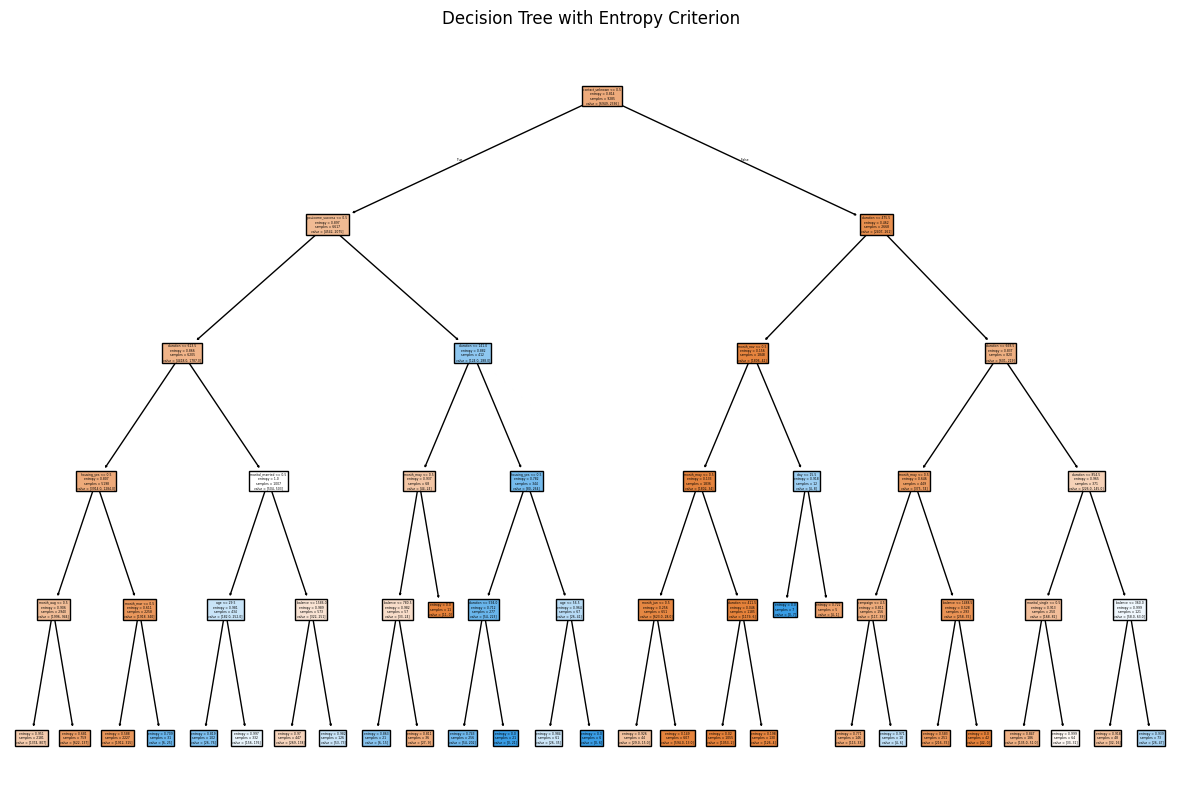

In [37]:
# Visualize the Decision Tree for Gini
plt.figure(figsize=(15, 10))
plot_tree(gini_model, filled=True, feature_names=X.columns, max_depth=5)
plt.title('Decision Tree with Gini Criterion')
plt.show()

# Visualize the Decision Tree for Entropy
plt.figure(figsize=(15, 10))
plot_tree(entropy_model, filled=True, feature_names=X.columns, max_depth=5)
plt.title('Decision Tree with Entropy Criterion')
plt.show()


# New Section